In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, RobustScaler
from datetime import datetime
from sklearn.decomposition import PCA,KernelPCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import seaborn as sns
color = sns.color_palette()


In [2]:
pd.set_option('display.max_rows',100)
prods=pd.read_csv('/Users/hemanth/Desktop/Clustering/cproducts.csv')
tender=pd.read_csv('/Users/hemanth/Desktop/Clustering/ctender.csv')

In [61]:
# prods=pd.read_csv("/Users/hemanth/Desktop/Recommendatio.csv/products.csv")
tender=pd.read_csv("/Users/hemanth/Desktop/Recommendatio.csv/tenderModes.csv")

In [4]:
prods["product_code"].nunique()

204114

In [36]:
dic={11:'Delhi',12:'Haryana',13:'Haryana',14:'Punjab',15:'Punjab',16:'Punjab',17:'Himachal Pradesh',
    18:'Jammu & Kashmir',19:'Jammu & Kashmir',20:'Uttar Pradesh',21:'Uttar Pradesh',22:'Uttar Pradesh',
    23:'Uttar Pradesh',24:'Uttar Pradesh',25:'Uttar Pradesh',26:'Uttar Pradesh',27:'Uttar Pradesh',28:'Uttar Pradesh',
    30:'Rajasthan',31:'Rajasthan',32:'Rajasthan',33:'Rajasthan',34:'Rajasthan',36:'Gujarat',37:'Gujarat',38:'Gujarat',
    39:'Gujarat',40:'Maharashtra',41:'Maharashtra',42:'Maharashtra',43:'Maharashtra',44:'Maharashtra',45:'Madhya Pradesh',
    46:'Madhya Pradesh',47:'Madhya Pradesh',48:'Madhya Pradesh',49:'Madhya Pradesh',50:'Andhra Pradesh',51:'Andhra Pradesh',
    52:'Andhra Pradesh',53:'Andhra Pradesh',56:'Karnataka',57:'Karnataka',58:'Karnataka',59:'Karnataka',
    60:'Tamil Nadu',61:'Tamil Nadu',62:'Tamil Nadu',63:'Tamil Nadu',64:'Tamil Nadu',67:'Kerala',68:'Kerala',69:'Kerala',
    70:'West Bengal',71:'West Bengal',72:'West Bengal',73:'West Bengal',74:'West Bengal',75:'Orissa',76:'Orissa',77:'Orissa',
    78:'Assam',79:'North Eastern',80:'Bihar',81:'Bihar',82:'Bihar',83:'Jharkand',84:'Bihar',85:'Bihar',90:'Army',91:'Army',
    92:'Army',93:'Army',94:'Army',95:'Army',96:'Army',97:'Army',98:'Army',99:'Army',35:'Madhya Pradesh',1:'Delhi',88:'Jharkhand',
    55:'Karnataka',66:'Karnataka',54:"Karnataka",65:'Tamil Nadu',10:'Tamil Nadu'}
dic1={'BB-MADURAI-KOCHADAI VILLAGE':'Tamil Nadu','BB-INDORE-TREASURE ISLAND':"Madhya Pradesh",
     'BB-INDORE-MALHAR MEGA MALL':'Madhya Pradesh','BB-LUDHIANA-FEROZEPUR-MF':'Punjab','BB-JAMSHEDPUR-NH-33':'Jharkand',
     'BB-HUBLI-GOKUL ROAD-AKSHAY CEN':'Kanataka','BB-AMRITSAR-TRILIUM MALL':'Punjab'}

In [37]:
zips=(prods['PinCode'].unique())
zips=zips[~np.isnan(zips)]

prods['State']=prods['PinCode'].apply(lambda x: dic[int(x)/10000] if x in zips else x)
tender['State']=tender['PinCode'].apply(lambda x: dic[int(x)/10000] if x in zips else x)

states=list(prods['State'].unique())
states.remove(np.nan)

prods['State']=prods.apply(lambda x: dic1[x['store_description']] if x['State'] not in states else x['State'] ,axis=1)
tender['State']=tender.apply(lambda x: dic1[x['store_description']] if x['State'] not in states else x['State'] ,axis=1)

le=LabelEncoder()
prods["State"]=le.fit_transform(prods["State"])
tender["State"]=le.fit_transform(tender["State"])

prods.drop(["PinCode"],axis=1,inplace=True)
tender.drop(["PinCode"],axis=1,inplace=True)

In [38]:
prods['Gender'].fillna('no_gender', inplace=True)
tender['Gender'].fillna('no_gender', inplace=True)
le=LabelEncoder()
prods["Gender"]=le.fit_transform(prods["Gender"])
tender["Gender"]=le.fit_transform(tender["Gender"])

In [39]:
prods['DOB']=prods['DOB'].fillna('1983-1-1')
prods['DOB']=prods['DOB'].replace(['NANA'],['1983-1-1'])
prods['DOB']=prods['DOB'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').year)
prods["DOB"]=2017-prods["DOB"]
tender['DOB']=tender['DOB'].fillna('1983-1-1')
tender['DOB']=tender['DOB'].replace(['NANA'],['1983-1-1'])
tender['DOB']=tender['DOB'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').year)
tender["DOB"]=2017-tender["DOB"]

In [40]:
prods['transactionDate']=prods['transactionDate'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
prods['Year']=prods['transactionDate'].apply(lambda x:x.year)
prods['Month']=prods['transactionDate'].apply(lambda x:x.month)
prods['Weekday']=prods['transactionDate'].apply(lambda x:x.weekday())
prods['Day']=prods['transactionDate'].apply(lambda x:x.day)

In [62]:
tender['transactionDate']=tender['transactionDate'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
tender['Year']=tender['transactionDate'].apply(lambda x:x.year)
tender['Month']=tender['transactionDate'].apply(lambda x:x.month)
tender['Weekday']=tender['transactionDate'].apply(lambda x:x.weekday())
tender['Day']=tender['transactionDate'].apply(lambda x:x.day)
tender["date"]=(tender["Year"]*10000)+(tender["Month"])
tender["freq"]=(tender["date"]*100)+tender["Day"]

In [42]:
le=LabelEncoder()
prods["discountUsed"]=le.fit_transform(prods["discountUsed"])

In [43]:
le=LabelEncoder()
prods["promo_code"]=le.fit_transform(prods["promo_code"])
prods.drop(['promotion_description'],axis=1,inplace=True)

In [9]:
tender.drop(['transactionDate'],axis=1,inplace=True)
prods.drop(['transactionDate'],axis=1,inplace=True)

In [10]:
tender.drop(['store_description'],axis=1,inplace=True)
prods.drop(['store_description'],axis=1,inplace=True)

In [47]:
prods["product_code"]=prods["product_code"].apply(lambda x: int(str(x)[:6]))
prods.drop(['product_description'],axis=1,inplace=True)

In [109]:
tender=tender[["customerID","store_code","date","freq","payment_amount_by_tender","transactionDate"]]

In [110]:
data=tender.copy(deep=True)

In [119]:
b = datetime.strptime('2017-06-30', '%Y-%m-%d')
rec=tender[["customerID","transactionDate"]]
rec["rec_date"]=b-rec["transactionDate"]
rec["rec_date"]=rec["rec_date"].apply(lambda x: x.days)
rec=rec[['customerID',"rec_date"]]
rec=rec.sort_values(["customerID","rec_date"],ascending=True)
rec=rec.groupby("customerID",as_index=False)["rec_date"].min()

/Users/hemanth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hemanth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [120]:
Cust_freq=data[["freq","customerID"]].drop_duplicates()
Cust_freq_count=Cust_freq.groupby(["customerID"])["freq"].count().reset_index().sort_values("freq", ascending=False)

In [121]:
Cust_monetary = data.groupby(["customerID"])["payment_amount_by_tender"].sum().reset_index().sort_values("payment_amount_by_tender", ascending=False)

In [122]:
rec=rec.merge(Cust_monetary,on=["customerID"],how='left')
train=rec.merge(Cust_freq_count,on=["customerID"],how='left')

In [89]:
data=tender.copy(deep=True)

In [54]:
Cust_freq=data[["freq","customerID"]].drop_duplicates()

Cust_freq_count=Cust_freq.groupby(["customerID"])["freq"].count().reset_index().sort_values("freq", ascending=False)


# def f(row):
#     if row["date"] <= 5:
#         val = 5
#     elif row["date"] >5 and row["date"] <= 10:
#         val = 4
#     elif row["date"] >10 and row["date"] <= 15:
#         val = 3
#     elif row["date"] >=15 and row["date"] <= 20:
#         val = 2
#     else :
#         val = 1
#     return val
# Cust_freq_count["Freq_Flag"] = Cust_freq_count.apply(f, axis=1)
# Cust_freq_count.drop(["date"],axis=1,inplace=True)

In [10]:
# Cust_recn=data[["date","customerID"]].drop_duplicates()
# def f(row):
#     if row["date"] >= 201612:
#         val = 1
#     elif row["date"] < 201612 and row["date"] > 201604:
#         val = 2
#     elif row["date"] <= 201604 and row["date"] > 201512:  
#         val=3
#     else: 
#         val = 4
#     return valf

# Cust_recn["Recency_Flag"] = Cust_recn.apply(f, axis=1)
# data_freq = Cust_recn.groupby("customerID",as_index=False)["Recency_Flag"].max()

In [91]:
Cust_monetary = data.groupby(["customerID"])["payment_amount_by_tender"].sum().reset_index().sort_values("payment_amount_by_tender", ascending=False)
unique_price=Cust_monetary[["payment_amount_by_tender"]].drop_duplicates()
unique_price=unique_price[unique_price["payment_amount_by_tender"] > 0]
unique_price["monetary_Band"] = pd.qcut(unique_price["payment_amount_by_tender"], 5)
unique_price=unique_price[["monetary_Band"]].drop_duplicates()

In [12]:
# def f(row):
#     if row["payment_amount_by_tender"] <= 1651:
#         val = 5
#     elif row["payment_amount_by_tender"] >1651 and row["payment_amount_by_tender"] <= 3566:
#         val = 4
#     elif row["payment_amount_by_tender"] >3566 and row["payment_amount_by_tender"] <= 6480:
#         val = 3
#     elif row["payment_amount_by_tender"] >6480 and row["payment_amount_by_tender"] <= 12748:
#         val=2
#     else:
#         val=1
        
#     return val
# Cust_monetary["Monetary_Flag"] = Cust_monetary.apply(f, axis=1)
# Cust_monetary.drop(["payment_amount_by_tender"],axis=1,inplace=True)

In [13]:
data_freq=data_freq.merge(Cust_monetary,on=["customerID"],how='left')
train=data_freq.merge(Cust_freq_count,on=["customerID"],how='left')

df=prods[["customerID","store_code"]]
train=df.merge(train,on=["customerID"],how='left')
train=train[["customerID","Recency_Flag","Monetary_Flag","Freq_Flag"]]
train=train.fillna(0)
train.drop_duplicates(inplace=True)


In [125]:
train.to_csv("/Users/hemanth/Desktop/csvs/flag2.csv",index=False)

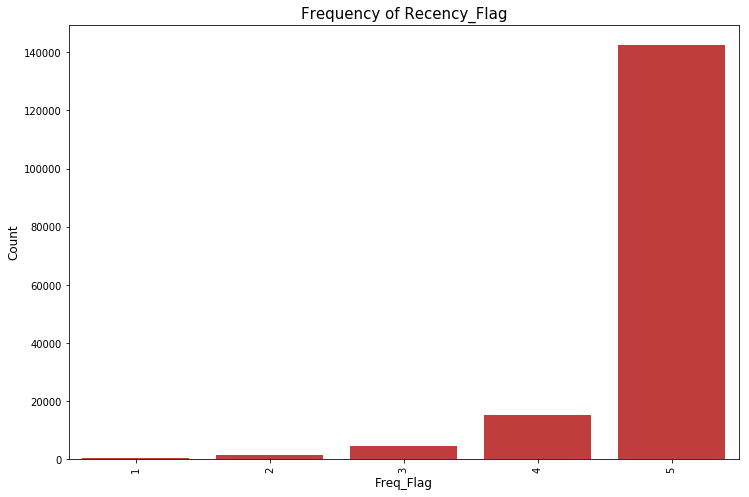

In [46]:
plt.figure(figsize=(12,8))
sns.countplot(x="Freq_Flag", data=Cust_freq_count, color=color[3])
plt.ylabel("Count", fontsize=12)
plt.xlabel("Freq_Flag", fontsize=12)
plt.xticks(rotation="vertical")
plt.title("Frequency of Recency_Flag", fontsize=15)
plt.show()

In [33]:
train

,customerID,Recency_Flag,Monetary_Flag,Freq_Flag
0,BBID_2041,3.0,1.0,3.0
1,BBID_2042,4.0,2.0,3.0
2,BBID_2043,2.0,2.0,3.0
3,BBID_2044,4.0,5.0,2.0
4,BBID_2045,1.0,1.0,3.0
5,BBID_2046,2.0,2.0,3.0
6,BBID_2047,2.0,1.0,3.0
7,BBID_2048,2.0,2.0,3.0
10,BBID_20411,2.0,1.0,3.0
11,BBID_20412,1.0,1.0,3.0


In [35]:
dic={0:'red',1:'blue',2:'yellow',3:'green',4:'black'}

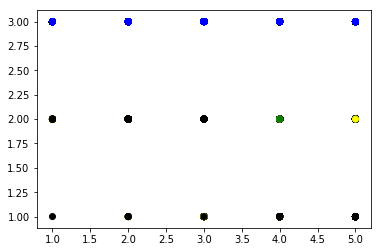

In [37]:
fig,ax=plt.subplots()
ax.scatter(train['Monetary_Flag'],train['Freq_Flag'],c=train['Recency_Flag'].apply(lambda x:dic[x]))
plt.show()

In [20]:
Cust_freq=data[["date","customerID"]].drop_duplicates()

Cust_freq_count=Cust_freq.groupby(["customerID"])["date"].count().reset_index().sort_values("date", ascending=False)


def f(row):
    if row["date"] <= 5:
        val = 3
    elif row["date"] >=5 and row["date"] <= 10:
        val = 2
    else :
        val = 1
    return val
Cust_freq_count["Freq_Flag"] = Cust_freq_count.apply(f, axis=1)
Cust_freq_count.drop(["date"],axis=1,inplace=True)


Cust_recn=data[["date","customerID"]].drop_duplicates()
def f(row):
    if row["date"] >= 201612:
        val = 1
    elif row["date"] < 201612 and row["date"] > 201604:
        val = 2
    elif row["date"] <= 201604 and row["date"] > 201512:  
        val=3
    else: 
        val = 4
    return val

Cust_recn["Recency_Flag"] = Cust_recn.apply(f, axis=1)
data_freq = Cust_recn.groupby("customerID",as_index=False)["Recency_Flag"].max()



Cust_monetary = data.groupby(["customerID"])["payment_amount_by_tender"].sum().reset_index().sort_values("payment_amount_by_tender", ascending=False)
unique_price=Cust_monetary[["payment_amount_by_tender"]].drop_duplicates()
unique_price=unique_price[unique_price["payment_amount_by_tender"] > 0]
unique_price["monetary_Band"] = pd.qcut(unique_price["payment_amount_by_tender"], 5)
unique_price=unique_price[["monetary_Band"]].drop_duplicates()


def f(row):
    if row["payment_amount_by_tender"] <= 11000:
        val = 3
    elif row["payment_amount_by_tender"] > 11000 and row["payment_amount_by_tender"] <= 23000:
        val = 2
    else:
        val = 1
    return val
Cust_monetary["Monetary_Flag"] = Cust_monetary.apply(f, axis=1)
Cust_monetary.drop(["payment_amount_by_tender"],axis=1,inplace=True)

data_freq=data_freq.merge(Cust_monetary,on=["customerID"],how='left')
train=data_freq.merge(Cust_freq_count,on=["customerID"],how='left')

In [19]:
df=prods[["customerID","store_code"]]

In [20]:
train=df.merge(train,on=["customerID"],how='left')

In [23]:
train=train.fillna(0)

In [65]:
train["customerID"].isin(test["customerID"]).value_counts()

True    11972
Name: customerID, dtype: int64

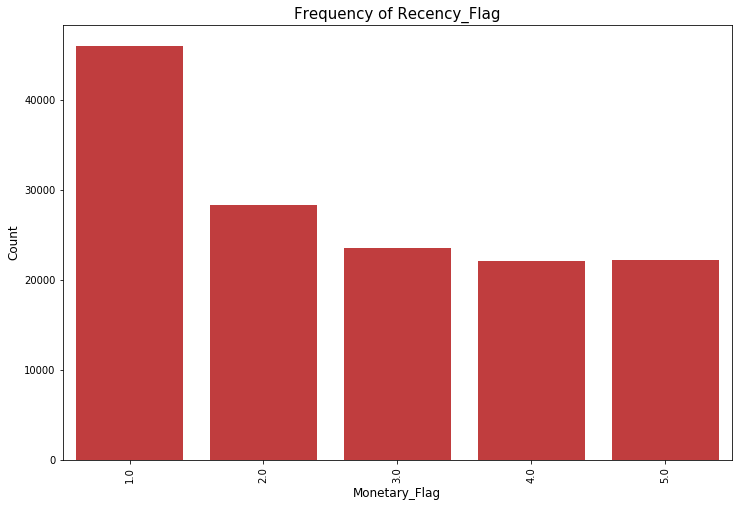

In [31]:
Cust_monetary

,customerID,Monetary_Flag
111364,BBID_211414981,5
116049,BBID_211419317,5
143525,BBID_211444893,5
56412,BBID_20444202,5
65083,BBID_20453330,5
118327,BBID_211421442,5
43863,BBID_2043016,5
62624,BBID_20450688,5
62495,BBID_20450543,5
81041,BBID_20471099,5


In [67]:
cld=train.drop(['store_code','customerID'], axis=1)
rbs = RobustScaler()
cld2 = rbs.fit_transform(cld)
    
km1 = KMeans(n_clusters=34)
km2 = km1.fit(cld2)
label = km2.predict(cld2)
silhouette_score(cld2, label)

1.0

In [200]:
customers=train["customerID"]
store=train["store_code"]

In [201]:
sub1 = pd.DataFrame({'customerID':customers, 'store_code':store, 'cluster':label},)

In [202]:
cols=['customerID','store_code','cluster']

In [203]:
sub1=sub1[cols]

In [204]:
np.savetxt('/Users/hemanth/Desktop/sub/subOne_5.txt', cld2)
sub1.to_csv('/Users/hemanth/Desktop/sub/subtwo_5.csv', index=False)

In [6]:
pd.set_option('display.max_columns',100)

In [2]:
df=pd.read_csv("/Users/hemanth/Downloads/Dataset_Round1_Assignment 1 (of 2)_Programmer.csv")

In [10]:
df1=pd.read_excel("/Users/hemanth/Downloads/LU_CUSTOMER.xlsx")

In [11]:
df2=pd.read_excel("/Users/hemanth/Downloads/LU_ORDER.xlsx")

In [15]:
df3=pd.read_excel("/Users/hemanth/Downloads/ORDER_DETAIL.xlsx")

In [17]:
df3.shape

(407529, 10)

In [24]:
df3["ITEM_ID"].nunique()

360